# ECSE415 - Intro to Computer Vision
## Tutorial 4 - Feature Detection in OpenCV

install opencv-contrib-python==3.3.0.10 if needed

## SIFT Features and Descriptors

In [2]:
#########################
# SIFT FEATURE DETECTOR #
#########################
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image 
img = cv2.imread("bird.png")
# copy image
img_disp = img.copy()
# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
keypoints = sift.detect(img, None)

# draw the keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# display
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))

<Figure size 1000x1000 with 2 Axes>

Num keypoints: 870


descriptors size: (780, 128)


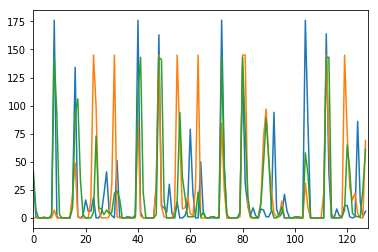

In [2]:
####################
# SIFT DESCRIPTORS #
####################

# load image 
img = cv2.imread("bird.png")

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
keypoints = sift.detect(img, None)

# compute SIFT descriptors
keypoints, descriptors = sift.compute(img, keypoints)

# Alternatively, we can use keypoints,descriptors = sift.detectAndCompute(gray,None) to get both

# num of SIFT keypoints/descriptors
print('descriptors size: '+ str(descriptors.shape))

# plot a couple of 1x128 SIFT descriptors
num = 3
for i in range(num):
    # plot the 256x1 np array using matplotlib plot()
    plt.plot(descriptors[i])
    plt.xlim([0,128]) # set x-axis limit
plt.show()

## SURF Features

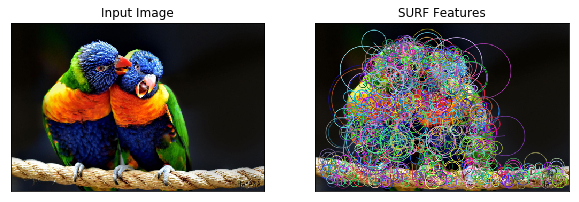

Num keypoints: 825


In [3]:
#########################
# SURF FEATURE DETECTOR #
#########################

# load image
img = cv2.imread("bird.png")
# copy image
img_disp = img.copy()
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)

# create SURF object
surf = cv2.xfeatures2d.SURF_create()

# detect SURF features
keypoints = surf.detect(img_gray, None)

# draw keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SURF Features"), plt.xticks([]), plt.yticks([])
plt.show()

# number of SURF keypoints
print("Num keypoints: " + str(len(keypoints)))


## Feature Matching

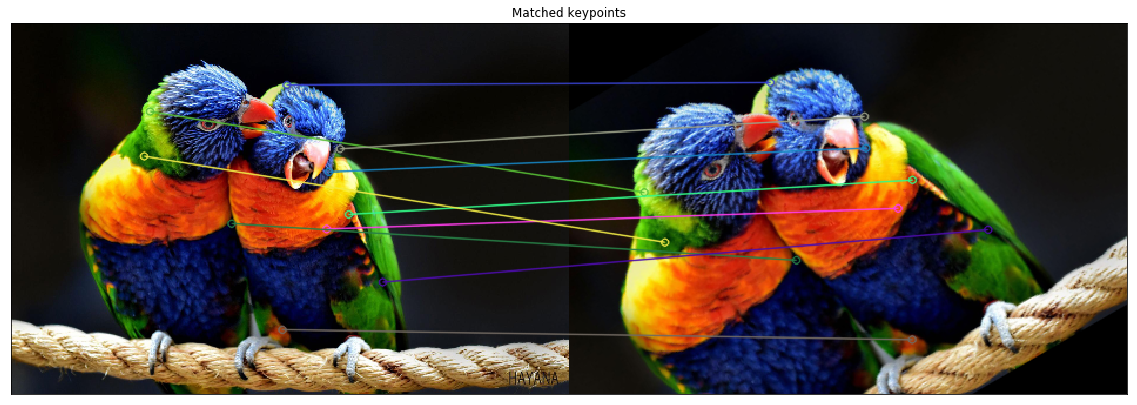

In [5]:
####################
# FEATURE MATCHING #
####################

# load the image 
img1 = cv2.imread("bird.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

height, width = img1.shape[0:2] # image size

# Create a rotated, scaled duplicate
# rotation marix around the center pixel, 30 degrees,scale of 1.2
M = cv2.getRotationMatrix2D((width/2,height/2),30,1.2)
# Apply the transformation matrix
img2 = cv2.warpAffine(img1,M,(width,height))

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img1,None)
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(descriptors1,descriptors2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,keypoints1,img2,keypoints2, matches[:10], img1, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.title("Matched keypoints"), plt.xticks([]), plt.yticks([])
plt.show()

####################
#  Manual Matching #
####################


# # use cv2.BFMatcher for the assignment
# # we will try to match a randomly-selected feature from img1 to img2
# idx = 0
# # Loop through all descriptors in img2 to find the closest match
# bestMatch_idx = -1
# bestMatch_dist = float('inf')
# for i in range(descriptors2.shape[0]):
#     dist = cv2.norm(descriptors1[idx],descriptors2[i],cv2.NORM_L2)
#     if dist < bestMatch_dist:
#         bestMatch_dist = dist
#         bestMatch_idx = i
        
# # Draw the keypoints
# img_disp1 = img1.copy()
# img_disp2 = img2.copy()
# # draw a filled circle on each point
# center1 = (int(keypoints1[idx].pt[0]),int(keypoints1[idx].pt[1]))
# center2 = (int(keypoints2[bestMatch_idx].pt[0]),int(keypoints2[bestMatch_idx].pt[1]))
# cv2.circle(img_disp1, center1, 10, (255,0,0), -1)
# cv2.circle(img_disp2, center2, 12, (255,0,0), -1)

# # Display
# plt.subplot(221),plt.imshow(img_disp1),plt.title('img1')
# plt.xticks([]), plt.yticks([])
# plt.subplot(222),plt.imshow(img_disp2),plt.title('img2')
# plt.xticks([]), plt.yticks([])

# # Plot the descriptors
# plt.subplot(223),plt.plot(descriptors1[idx]),plt.title('desc1')
# plt.xlim([0,128]) # Set x-axis limit
# plt.subplot(224),plt.plot(descriptors2[bestMatch_idx]),plt.title('desc2')
# plt.xlim([0,128]) # Set x-axis limit
# plt.show() # display all subplots

# HoG features

(35, 52)
(35, 52, 9)
(35, 52, 1)


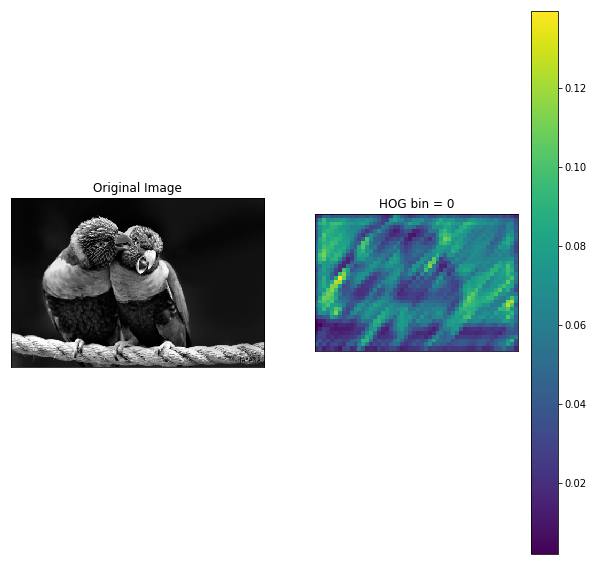

In [20]:
img = cv2.cvtColor(cv2.imread("bird.png"),
                   cv2.COLOR_BGR2GRAY)

cell_size = (9, 9)  # h x w in pixels
block_size = (4, 4)  # h x w in cells
nbins = 9  # number of orientation bins

# create HoG Object
# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)
# print(hog)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
# Compute HoG features
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first

# print(hog_feats.shape)
# hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
# Indexing is by rows then columns.

# computation for BlockNorm
gradients = np.full((n_cells[0], n_cells[1], 9), 0, dtype=float)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1
print(gradients.shape)
print(cell_count.shape)
# Average gradients
gradients /= cell_count

# Preview
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

bin = 0  # angle is 360 / nbins * direction
plt.subplot(122)
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0"), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()